We are going to re-create a FiveThirtyEight analysis for this assignment.

In [143]:
library('tidyverse')
paintings = read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')

head(paintings)

EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,⋯,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
S01E06,"""WINTER MOON""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0


In [144]:
df = 
  paintings %>% 
  pivot_longer(names_to='element', values_to='count',
               cols=-one_of('EPISODE','TITLE')) %>% filter(count > 0) %>%print

# A tibble: 3,221 x 4
   EPISODE TITLE                     element   count
   <fct>   <fct>                     <chr>     <int>
 1 S01E01  "\"A WALK IN THE WOODS\"" BUSHES        1
 2 S01E01  "\"A WALK IN THE WOODS\"" DECIDUOUS     1
 3 S01E01  "\"A WALK IN THE WOODS\"" GRASS         1
 4 S01E01  "\"A WALK IN THE WOODS\"" RIVER         1
 5 S01E01  "\"A WALK IN THE WOODS\"" TREE          1
 6 S01E01  "\"A WALK IN THE WOODS\"" TREES         1
 7 S01E02  "\"MT. MCKINLEY\""        CABIN         1
 8 S01E02  "\"MT. MCKINLEY\""        CLOUDS        1
 9 S01E02  "\"MT. MCKINLEY\""        CONIFER       1
10 S01E02  "\"MT. MCKINLEY\""        MOUNTAIN      1
# … with 3,211 more rows


In [145]:
df = df %>% mutate(element = fct_infreq(element) %>% fct_lump(n = 10) %>% fct_rev) %>%print

# A tibble: 3,221 x 4
   EPISODE TITLE                     element   count
   <fct>   <fct>                     <fct>     <int>
 1 S01E01  "\"A WALK IN THE WOODS\"" BUSHES        1
 2 S01E01  "\"A WALK IN THE WOODS\"" DECIDUOUS     1
 3 S01E01  "\"A WALK IN THE WOODS\"" GRASS         1
 4 S01E01  "\"A WALK IN THE WOODS\"" RIVER         1
 5 S01E01  "\"A WALK IN THE WOODS\"" TREE          1
 6 S01E01  "\"A WALK IN THE WOODS\"" TREES         1
 7 S01E02  "\"MT. MCKINLEY\""        Other         1
 8 S01E02  "\"MT. MCKINLEY\""        CLOUDS        1
 9 S01E02  "\"MT. MCKINLEY\""        CONIFER       1
10 S01E02  "\"MT. MCKINLEY\""        MOUNTAIN      1
# … with 3,211 more rows


In [146]:
p = ggplot(df, aes(x = element)) + 
    geom_bar(fill = "#128ada", width = 0.7) + 
    geom_text(stat='count', aes(label=..count..), hjust=-0.1, size=2.5) +
    coord_flip()

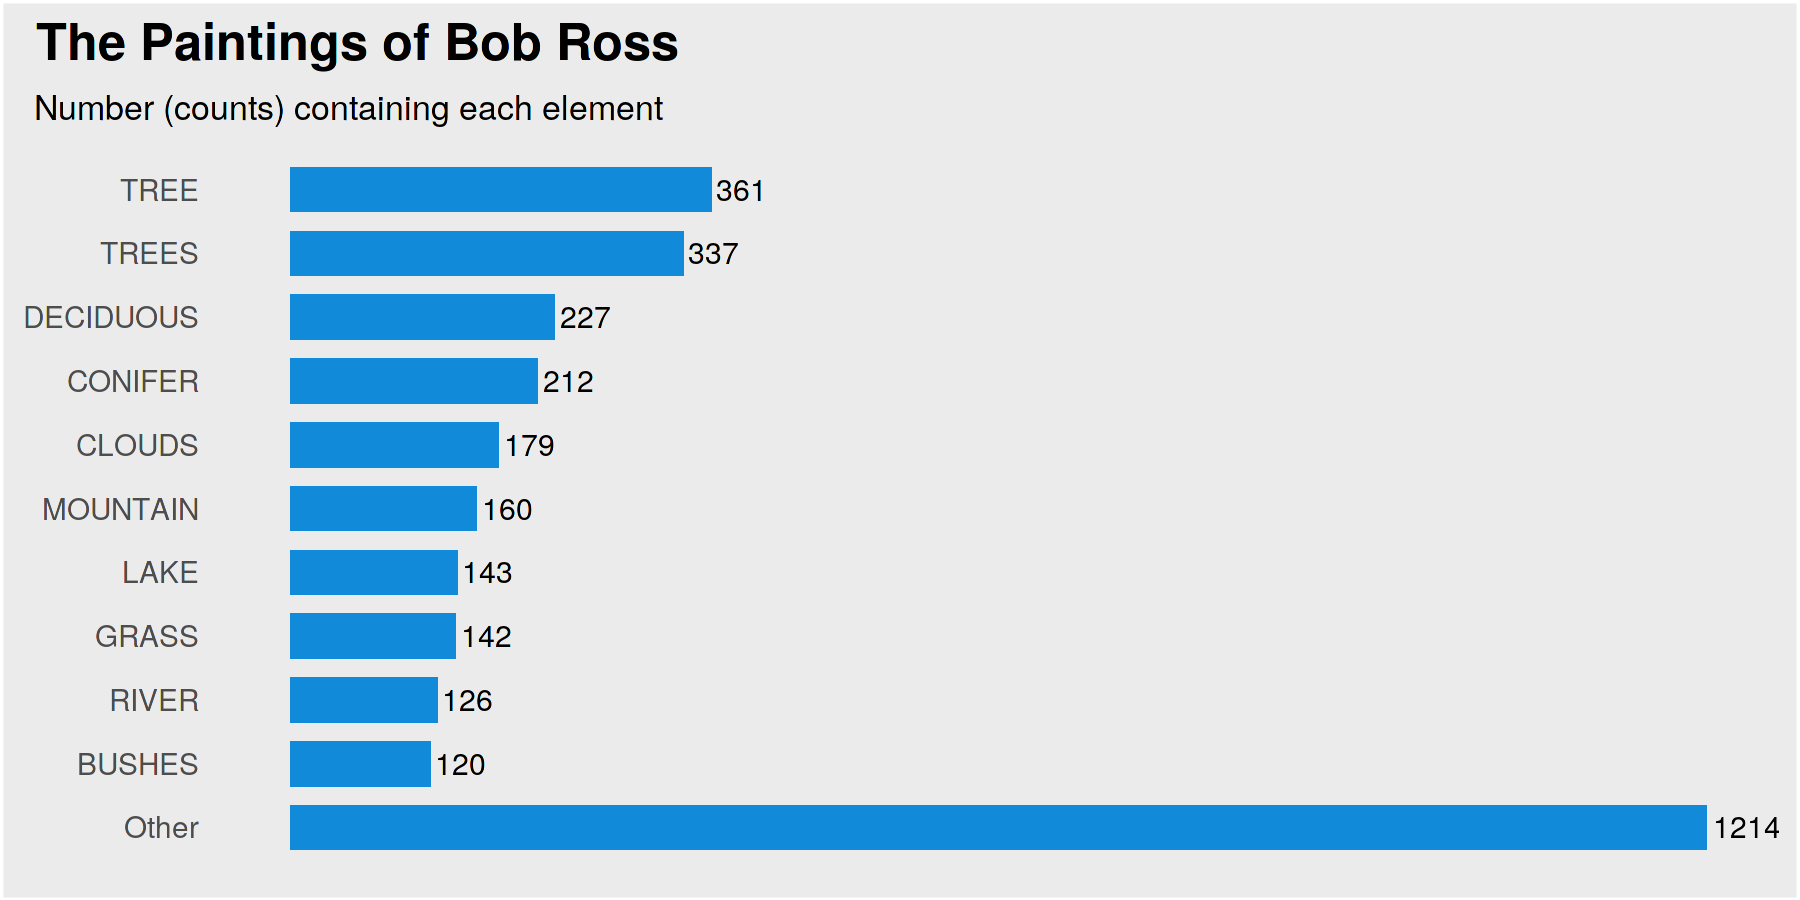

In [142]:
options(repr.plot.width=6, repr.plot.height=3, repr.plot.res=300)
p = p + labs(title = "The Paintings of Bob Ross", 
             x=NULL, y=NULL, subtitle="Number (counts) containing each element") +
  theme(panel.grid.major = element_line(colour = NA), 
        panel.grid.minor = element_line(colour = NA),
        plot.background = element_rect(fill = "grey92"),
        plot.title = element_text(size = 12, hjust = -0.2,  face="bold"),
        plot.subtitle = element_text(size = 8, hjust = -0.2),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size=7, hjust = 1))

p

The data can be found here:  

[https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv](https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv)

Using the data, re-create this figure from the article:

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png" style="width: 500px" />

In your version of this figure,

1. **Don't worry about using the variable names exactly as in the article (_i.e._ just use the column names from the original data).**
1. **Plot counts instead of percentages.**
1. **Only show the top ten categories by count and group the remaining categories into a category named 'Other'.** 